# 7. 딥러닝 비전

## 7-1. 텐서플로를 이용한 데이터 확인

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


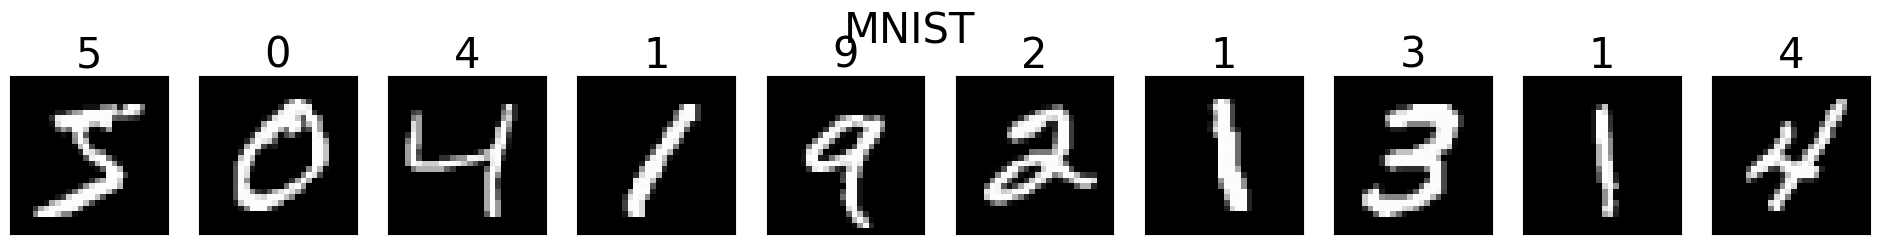

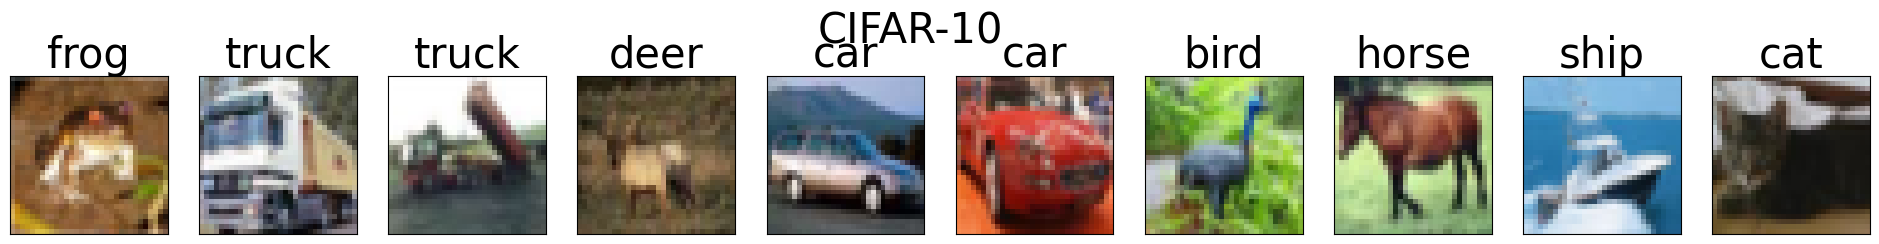

In [6]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
plt.figure(figsize=(24,3))
plt.suptitle('MNIST',fontsize=30)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]),fontsize=30)

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10',fontsize=30)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]],fontsize=30)

## 7-2. 다층 퍼셉트론으로 mnist 손글씨

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))

mlp.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0905 - accuracy: 0.1213 - val_loss: 0.0874 - val_accuracy: 0.1980 - 3s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0846 - accuracy: 0.2942 - val_loss: 0.0808 - val_accuracy: 0.3893 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0777 - accuracy: 0.4683 - val_loss: 0.0735 - val_accuracy: 0.5700 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0702 - accuracy: 0.6209 - val_loss: 0.0655 - val_accuracy: 0.6814 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0626 - accuracy: 0.6865 - val_loss: 0.0581 - val_accuracy: 0.7208 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0559 - accuracy: 0.7179 - val_loss: 0.0520 - val_accuracy: 0.7454 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0505 - accuracy: 0.7413 - val_loss: 0.0471 - val_accuracy: 0.7671 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0462 - accuracy: 0.7642 - val_loss: 0.0432 - val_accuracy: 0.7858 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

## 코드 설명 및 정리

## 텐서플로 모듈 불러오기
```
from tensorflow.keras.~~~~ import ~~~~
```
### models 모듈
```
from tensorflow.keras.models import Sequential
```

- Sequential과 functional API 두 모델을 제공.
- 다층 퍼셉트론처럼 왼쪽에서 오른쪽으로 계산이 흐르는 경우 Sequential 사용.

### layers 모듈
```
from tensorflow.keras.layers import Dense
```

- 여러가지 층을 제공
- 다층 퍼셉트론을 구성하는 완전연결층은 Dense클래스로 쌓음.

### optimizers 모듈
```
from tensorflow.keras.optimizers import SGD
```

- 학습 알고리즘이 사용하는 옵티마이저 함수를 제공.
- SGD, Adam, AdaGrad, RMSprop 등이 있음.

## 다층 퍼셉트론 구축

### Sequential 함수로 mlp 객체 생성
```
mlp = Sequential()
```

### add함수로 층 쌓기
### 첫 번째 층
```
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
```

- input_shape=(784,)는 입력층에 784개 노드 배치.
- units = 512는 은칙층에 512개 노드 배치.
- activation='tanh'는 활성 함수로 hyperbolic tangent를 사용.

### 두 번째 층 
```
mlp.add(Dense(units=10,activation='softmax'))
```

- 텐서플로가 이전 층의 노드 개수를 기억하므로 input_shape 생략 가능.
- units = 10은 출력층에 노드 10개 배치.
- activation='softmax'는 출력층이 활성함수로 softmax를 사용.

## 신경망 모델 학습
### 앞에서 구축한 신경말 모델을 학습하는 과정으로 항상 compile함수와 fit함수가 동시에 사용됨.

### compile 함수
```
mlp.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

```

- loss='MSE' 인수는 손실함수로 MSE(평균제곱오차)를 사용.
- optimizer = SGD(learning_rate=0.01) 인수는 옵티마이저로 학습률 0.01로 설정.

### fit 함수
```
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
```

- 실제로 학습을 실행하기 때문에 가장 많은 시간 소요.
- batch_size = 128은 미니 배치 크기를 128로 설정.
- epochs = 50은 세대를 50번 반복.
- validation_data = (x_test, y_test)는 학습 도중에 x_test와 y_test를 가지고 성능을 측정.
- verbose = 2는 학습 도중에 세대마다 선능을 출력.
- verbose = 1이면 진행 막대만 표시.
- verbose = 0이면 출력 x.

## 예측
### 예측을 통해 성능을 측정.
```
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)
```

- evaluate 함수로 성능을 측정하여 res 객체에 저장.
- x_test와 y_test 인수는 테스트 집합으로 성능을 측정하라는 지시.
- res는 여러정보를 가지는데 res[1]은 정확률이고 *100을하여 퍼센트로 나타냄.

## 7-3. 다층 퍼셉트론으로 mnist 손글씨 (Adam 옵티마이저)

### 7-2의 학습 부분에서 SGD를 Adam으로 바꾼 예제
### learning_rate를 Adam의 기본값인 0.001로 설정

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))

mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 4s - loss: 0.0148 - accuracy: 0.9028 - val_loss: 0.0102 - val_accuracy: 0.9336 - 4s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0089 - accuracy: 0.9427 - val_loss: 0.0076 - val_accuracy: 0.9510 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9587 - val_loss: 0.0064 - val_accuracy: 0.9592 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0050 - accuracy: 0.9684 - val_loss: 0.0052 - val_accuracy: 0.9674 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0040 - accuracy: 0.9754 - val_loss: 0.0046 - val_accuracy: 0.9705 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9795 - val_loss: 0.0039 - val_accuracy: 0.9747 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0028 - accuracy: 0.9830 - val_loss: 0.0038 - val_accuracy: 0.9751 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0023 - accuracy: 0.9866 - val_loss: 0.0039 - val_accuracy: 0.9755 - 3s/epoch - 6ms/step
Epoch 9/50
469/469 - 3s 

## 7-4 다층 퍼셉트론으로 MNIST 인식하기(SGD와 Adam의 성능 그래프 비교)

Epoch 1/50
469/469 - 2s - loss: 0.0896 - accuracy: 0.2000 - val_loss: 0.0867 - val_accuracy: 0.2701 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0841 - accuracy: 0.3146 - val_loss: 0.0805 - val_accuracy: 0.3989 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0774 - accuracy: 0.4508 - val_loss: 0.0732 - val_accuracy: 0.5168 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0704 - accuracy: 0.5415 - val_loss: 0.0663 - val_accuracy: 0.5893 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0639 - accuracy: 0.6058 - val_loss: 0.0600 - val_accuracy: 0.6470 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0581 - accuracy: 0.6529 - val_loss: 0.0546 - val_accuracy: 0.6801 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0532 - accuracy: 0.6804 - val_loss: 0.0501 - val_accuracy: 0.7012 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0492 - accuracy: 0.6988 - val_loss: 0.0465 - val_accuracy: 0.7213 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

Epoch 18/50
469/469 - 3s - loss: 5.5876e-04 - accuracy: 0.9973 - val_loss: 0.0031 - val_accuracy: 0.9807 - 3s/epoch - 6ms/step
Epoch 19/50
469/469 - 3s - loss: 5.0306e-04 - accuracy: 0.9976 - val_loss: 0.0029 - val_accuracy: 0.9811 - 3s/epoch - 6ms/step
Epoch 20/50
469/469 - 3s - loss: 5.5281e-04 - accuracy: 0.9971 - val_loss: 0.0034 - val_accuracy: 0.9767 - 3s/epoch - 6ms/step
Epoch 21/50
469/469 - 3s - loss: 5.3181e-04 - accuracy: 0.9972 - val_loss: 0.0031 - val_accuracy: 0.9799 - 3s/epoch - 6ms/step
Epoch 22/50
469/469 - 3s - loss: 3.6869e-04 - accuracy: 0.9982 - val_loss: 0.0030 - val_accuracy: 0.9806 - 3s/epoch - 6ms/step
Epoch 23/50
469/469 - 3s - loss: 3.2880e-04 - accuracy: 0.9983 - val_loss: 0.0030 - val_accuracy: 0.9806 - 3s/epoch - 6ms/step
Epoch 24/50
469/469 - 3s - loss: 4.7432e-04 - accuracy: 0.9974 - val_loss: 0.0035 - val_accuracy: 0.9767 - 3s/epoch - 7ms/step
Epoch 25/50
469/469 - 3s - loss: 3.7001e-04 - accuracy: 0.9981 - val_loss: 0.0029 - val_accuracy: 0.9813 - 3s/e

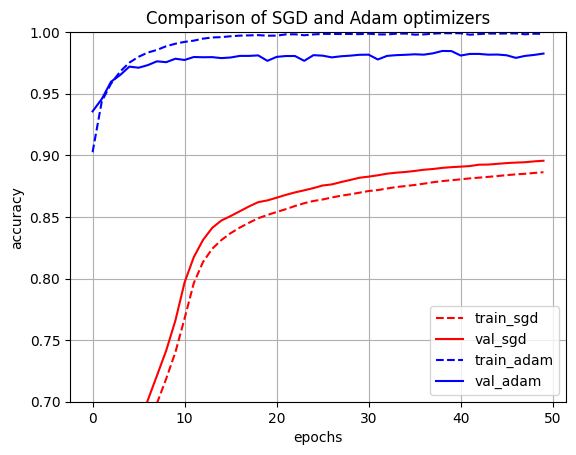

In [12]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))

mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate = 0.01), metrics = ['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('SGD 정확률 = ', mlp_sgd.evaluate(x_test, y_test, verbose = 0)[1]*100)

mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))

mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate = 0.001), metrics = ['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('Adam 정확률 = ', mlp_adam.evaluate(x_test, y_test, verbose = 0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

## 코드 설명 및 정리

## 하이퍼 매개변수 조정

- SGD(learning_rate=0.01)과 Adam(learning_rate=0.001)로 서로 비교한 결과 Adam이 월등히 좋다는 사실 파악

## 하이퍼 매개변수 조정 요령

- 1. 텐서플로가 제공하는 기본값 사용
- 2. 신뢰할 수 있는 논문이나 문서, 웹사이트에서 제공하는 권고 사항 따르기
- 3. 중요한 하이퍼 매개변수 1~3개에 대해 성능 실험을 통해 최적값을 스스로 설정

## 7-5. 깊은 다층 퍼셉트론으로 mnist 인식

Epoch 1/50
469/469 - 12s - loss: 0.3989 - accuracy: 0.8986 - val_loss: 0.1787 - val_accuracy: 0.9477 - 12s/epoch - 26ms/step
Epoch 2/50
469/469 - 10s - loss: 0.1420 - accuracy: 0.9591 - val_loss: 0.1233 - val_accuracy: 0.9625 - 10s/epoch - 22ms/step
Epoch 3/50
469/469 - 10s - loss: 0.0963 - accuracy: 0.9716 - val_loss: 0.0945 - val_accuracy: 0.9717 - 10s/epoch - 22ms/step
Epoch 4/50
469/469 - 10s - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0790 - val_accuracy: 0.9757 - 10s/epoch - 22ms/step
Epoch 5/50
469/469 - 10s - loss: 0.0529 - accuracy: 0.9847 - val_loss: 0.0802 - val_accuracy: 0.9743 - 10s/epoch - 22ms/step
Epoch 6/50
469/469 - 10s - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.0718 - val_accuracy: 0.9773 - 10s/epoch - 22ms/step
Epoch 7/50
469/469 - 10s - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0712 - val_accuracy: 0.9774 - 10s/epoch - 22ms/step
Epoch 8/50
469/469 - 10s - loss: 0.0221 - accuracy: 0.9945 - val_loss: 0.0605 - val_accuracy: 0.9813 - 10s/epoch - 22ms/step


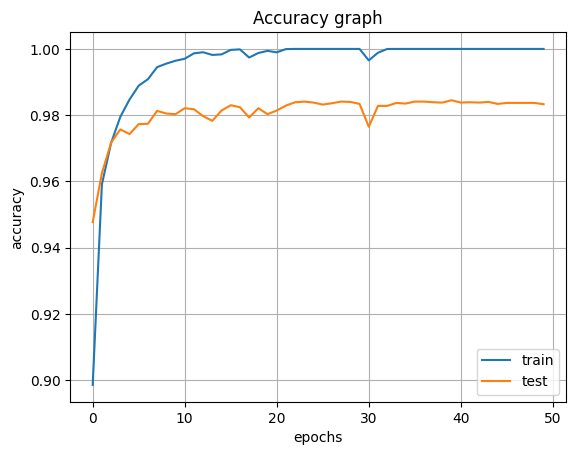

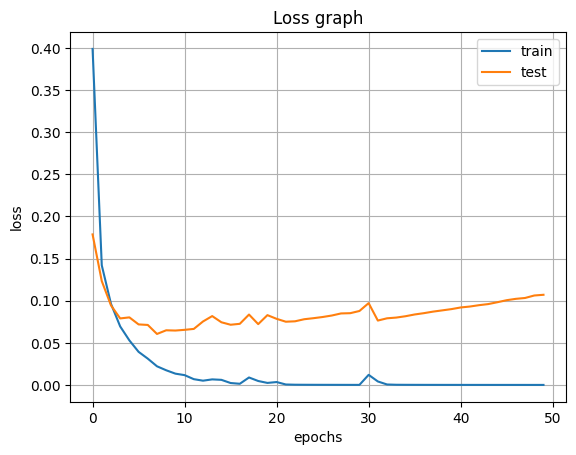

In [16]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units = 1024, activation = 'relu', input_shape = (784, )))
dmlp.add(Dense(units = 512, activation = 'relu'))
dmlp.add(Dense(units = 512, activation = 'relu'))
dmlp.add(Dense(units = 10, activation = 'softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('정확률 = ', dmlp.evaluate(x_test, y_test, verbose = 0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

## 코드 설명 및 정리

## dmlp.add(Dense)로 층 생성

- 4개의 층을 쌓아 깊은 다층 퍼셉트론 생성
- 3개의 은닉층의 개수는 1024, 512, 512로 설정
- activation 매개변수는 'relu'로 ReLU 함수 사용
- loss는 categorical_crossentropy를 설정하여 손실 함수로 교차 엔트로피 사용 (평균제곱오차보다 성능이 좋음)
- Adam의 학습률을 0.0001로 설정하여 천천히 학습

## save 함수

```
dmlp.save('dmlp_trained.h5)
```

- fit함수로 학습을 마친 신경망 모델의 구조 정보와 가중치 값을 지정한 파일에 저장
- 파일 포맷은 대용량의 과학 데이터를 계층적으로 저장할 때 주로 쓰는 h5임
- 딥러닝에선 학습에 시간이 많이 걸리기 때문에 학습을 마친 후 save로 신경망 정보를 파일에 저장해 두었다가 load_model 함수로 불러다 씀

## 7-6. 깊은 다층 퍼셉트론으로 CIFAR-10 인식

Epoch 1/50
391/391 - 13s - loss: 1.8181 - accuracy: 0.3526 - val_loss: 1.6812 - val_accuracy: 0.4039 - 13s/epoch - 32ms/step
Epoch 2/50
391/391 - 12s - loss: 1.6249 - accuracy: 0.4249 - val_loss: 1.6500 - val_accuracy: 0.4115 - 12s/epoch - 30ms/step
Epoch 3/50
391/391 - 12s - loss: 1.5375 - accuracy: 0.4558 - val_loss: 1.5396 - val_accuracy: 0.4577 - 12s/epoch - 30ms/step
Epoch 4/50
391/391 - 12s - loss: 1.4713 - accuracy: 0.4785 - val_loss: 1.4912 - val_accuracy: 0.4654 - 12s/epoch - 30ms/step
Epoch 5/50
391/391 - 12s - loss: 1.4301 - accuracy: 0.4921 - val_loss: 1.4520 - val_accuracy: 0.4826 - 12s/epoch - 30ms/step
Epoch 6/50
391/391 - 11s - loss: 1.3805 - accuracy: 0.5112 - val_loss: 1.4309 - val_accuracy: 0.4947 - 11s/epoch - 29ms/step
Epoch 7/50
391/391 - 12s - loss: 1.3415 - accuracy: 0.5239 - val_loss: 1.4129 - val_accuracy: 0.4965 - 12s/epoch - 30ms/step
Epoch 8/50
391/391 - 12s - loss: 1.3086 - accuracy: 0.5363 - val_loss: 1.3957 - val_accuracy: 0.5050 - 12s/epoch - 30ms/step


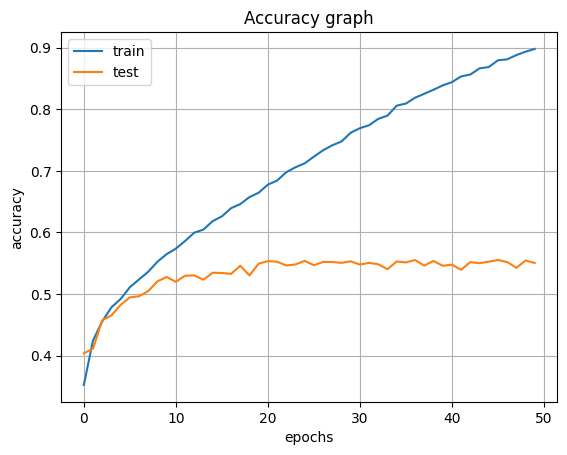

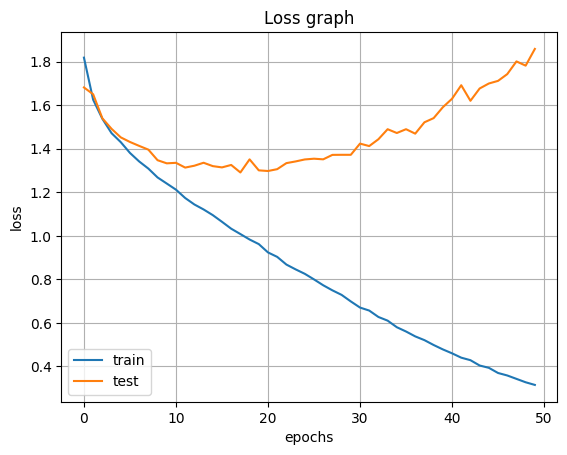

In [18]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train),(x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units = 1024, activation = 'relu', input_shape = (3072, )))
dmlp.add(Dense(units = 512, activation = 'relu'))
dmlp.add(Dense(units = 512, activation = 'relu'))
dmlp.add(Dense(units = 10, activation = 'softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('정확률 = ', dmlp.evaluate(x_test, y_test, verbose = 0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

## 코드 설명 및 정리

## 다른 점

- train_reshape와 test_reshape, input_shape의 인수가 달라진 걸 제외하면 앞의 깊은 다층 퍼셉트론으로 mnist를 인식하는 것과 동일

## 과잉 적합

- 학습 알고리즘이 훈련 집합에 과다하게 맞추다 보니 일반화 능력을 상실하는 현상
- 훈련 집합에 대해 90% 정도가 나온 것에 비해 테스트 집합에 대해서는 55% 가량 달성하여 총 35% 차이가 난다. 이를 토대로 과잉 적합 발생했다고 판단

### 일반화

- 학습에 사용하지 않은 샘플 집합, 즉 테스트 집합에 대해 높은 성능을 유지하는 능력



## 7-7. 우편번호 인식기 v.1(DMLP 버전) 구현

#### recognition 부분 다시 해보기

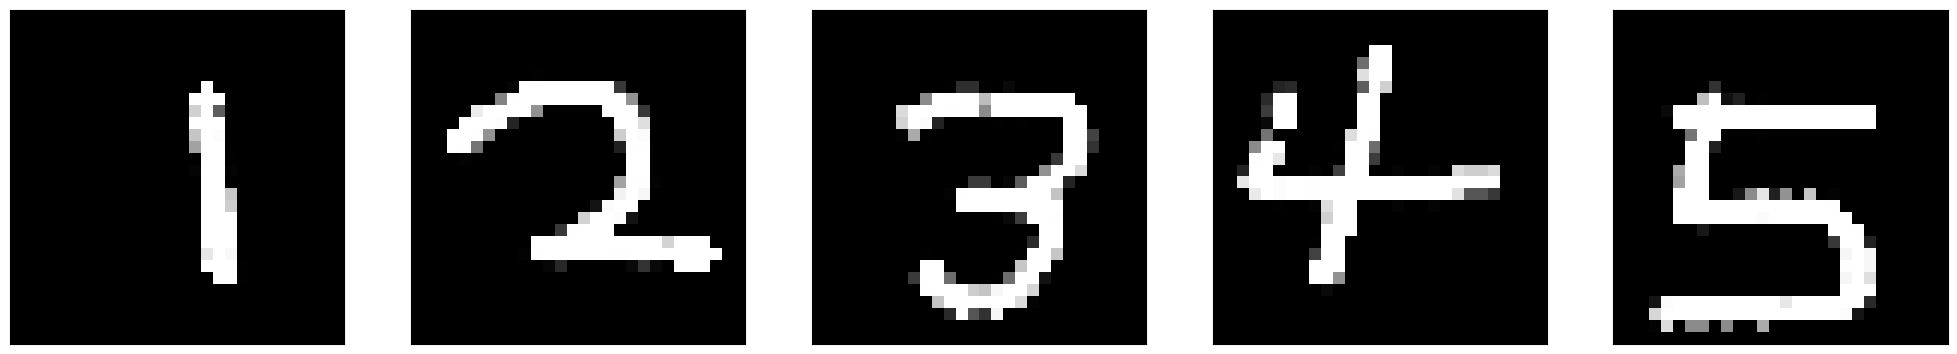

In [2]:
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()